In [ ]:
# import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 1) Data Exploration
Attributes: 
   1. Pregnancies: Number of times pregnant
   2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test. This is a lab test to check how your body handles the sugar.  
  * Normal person (2 hr after glucose test) should have  less than 140mg/dl
   3. Blood Pressure: Diastolic blood pressure (mm Hg). 
  * Normal values are less than 80. 
  * Stage 1 hypertension: 80-89
  * Stage 2 hypertension: 90 or more
  * Hypertensive crisis: 120 or more

   4. Skin Thickness: Triceps skin fold thickness (mm)
  * For adults the normal values are 2.5 mm for men; 18 mm for women
   5. Insulin: 2-Hour serum insulin (mu U/ml). Insulin is a hormone that helps move blood sugar.
  * 150 mu U/ml is a critical number, in which most people with type 1 or 2 needs insulin theraphy
   6. BMI: Body mass index (weight in kg/(height in m)^2): Assess  if a person is overweight or underweight. 
  * Underweight: less than 18.5
  * Normal weight: 18.5 - 24.9
  * Overweight: 25-29.9
  * Obese: over 30.0
   7. Diabetes pedigree function: Provides some information on the history in relatives. This is a measure of genetic influence.
   8. Age (years)
   9. Class variable (0 or 1): Outcome 1 indicates having diabetes; 0 indicates not having diabetes.


   
   ***https://github.com/fonnesbeck/Bios8366/blob/master/data/pima-indians-diabetes.metadata.txt***

   ***https://medium.com/analytics-vidhya/analyzing-pima-indian-diabetes-dataset-36d02a8a10e5***



In [ ]:
# data okumak
data = pd.read_csv("/content/drive/MyDrive/Python ile veri analizi - Kasim/Proje 1 - diabetes/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
data["BMI"]

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [ ]:
data["Outcome"] = data['Outcome'].astype(str)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
data['Outcome'].describe()

count     768
unique      2
top         0
freq      500
Name: Outcome, dtype: object

([0, 1], <a list of 2 Text major ticklabel objects>)

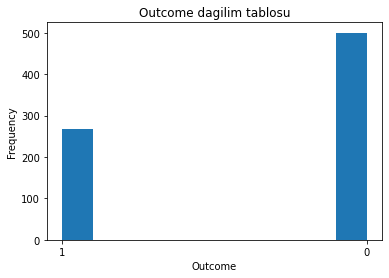

In [ ]:
# outcome distribution
plt.hist(data['Outcome']);
plt.title('Outcome dagilim tablosu');
plt.xlabel("Outcome")
plt.ylabel("Frequency");
plt.xticks()

In [ ]:
data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

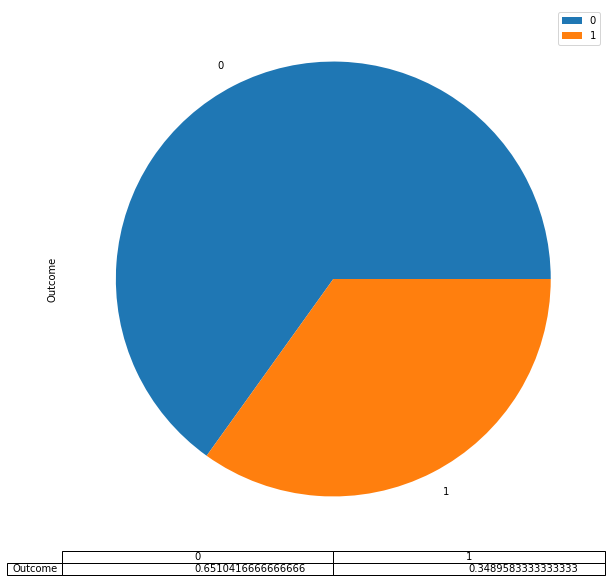

In [ ]:
data['Outcome'].value_counts(normalize=True).plot(kind='pie', legend=True, table=True, figsize=(15,10))

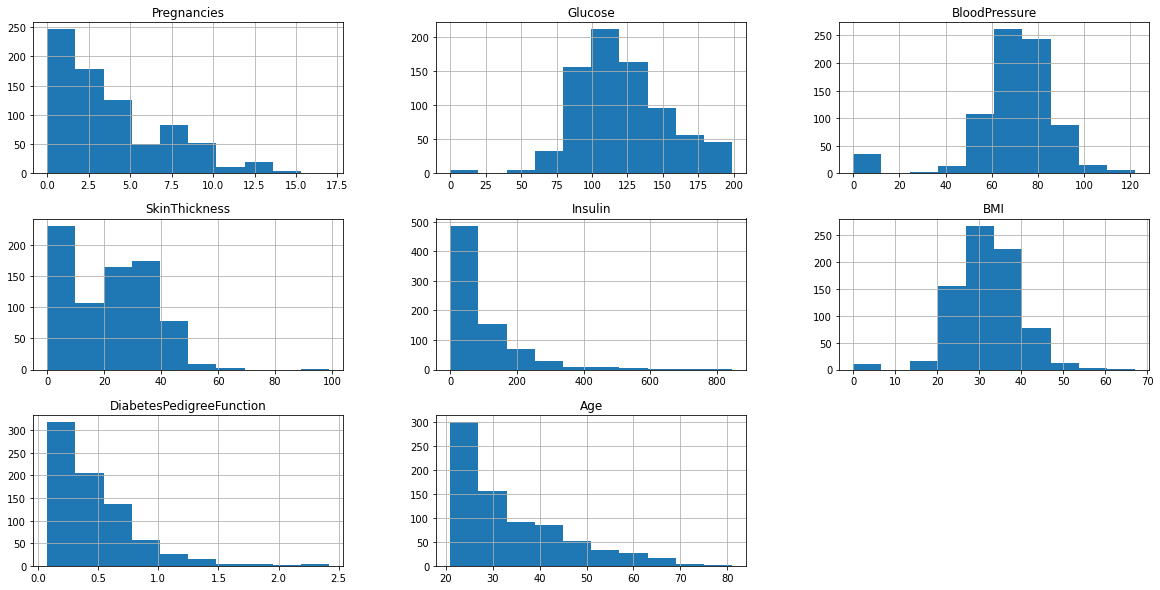

In [ ]:
data.hist(figsize=(20,10));

In [ ]:
# 2. feature engineering and data cleaning

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
data[data['SkinThickness'] > 80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [ ]:
data = data[data['SkinThickness'] != 99]

In [ ]:
data[data['Pregnancies'] > 15]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [ ]:
data = data[data['Pregnancies'] < 15]

In [ ]:
# missing values
eksik_bilgi = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
data[eksik_bilgi]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [ ]:
data[eksik_bilgi] = np.where(data[eksik_bilgi] == 0, np.nan, data[eksik_bilgi])

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
761,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
763,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               765 non-null    int64  
 1   Glucose                   760 non-null    float64
 2   BloodPressure             730 non-null    float64
 3   SkinThickness             538 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       754 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       765 non-null    int64  
 8   Outcome                   765 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 53.9+ KB


In [ ]:
data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

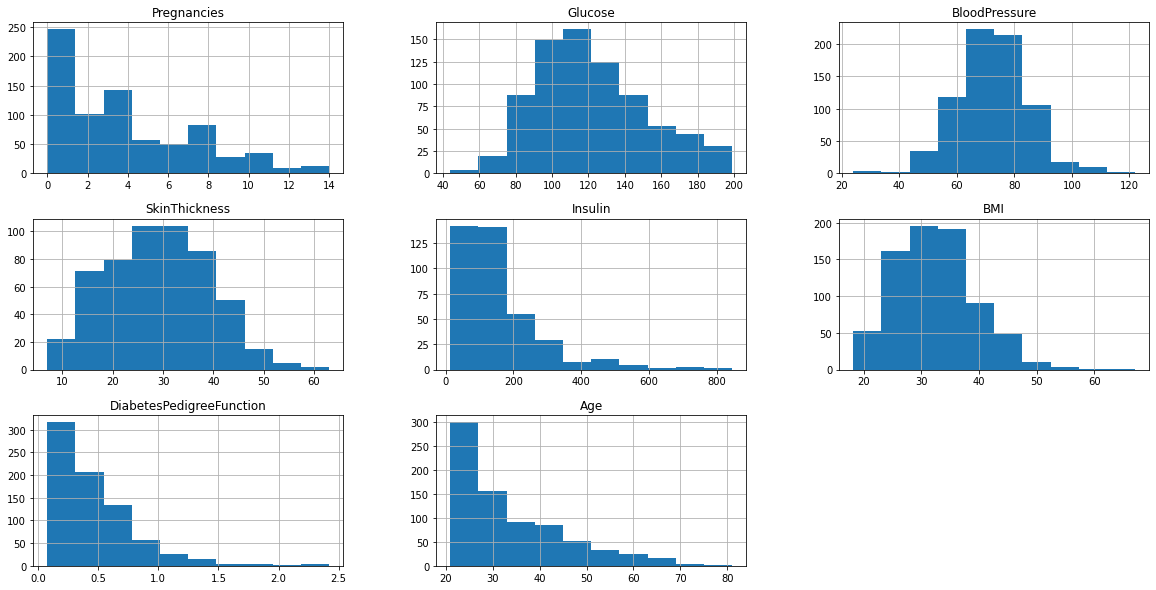

In [ ]:
data.hist(figsize=(20, 10));

In [ ]:
data.Age.describe()

count    765.000000
mean      33.172549
std       11.721195
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

In [ ]:
data['Age'].describe()

count    765.000000
mean      33.172549
std       11.721195
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

In [ ]:
data['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
40    13
39    12
43    12
35    10
50     8
51     8
52     8
44     8
58     7
54     6
47     5
49     5
48     5
57     5
53     5
60     5
66     4
63     4
55     4
67     3
56     3
59     3
65     3
62     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [ ]:
data['age_bins'] = pd.cut(x=data['Age'],bins=[20,30,40,50,60,70,80,90] )

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"


In [ ]:
data['age_bins'] = data['age_bins'].astype(str)

In [ ]:
data.age_bins

0      (40, 50]
1      (30, 40]
2      (30, 40]
3      (20, 30]
4      (30, 40]
         ...   
760    (60, 70]
761    (20, 30]
762    (20, 30]
763    (40, 50]
764    (20, 30]
Name: age_bins, Length: 765, dtype: object

In [ ]:
# data cleaning

In [ ]:
data_yari_temiz = data.fillna(data.median())

In [ ]:
data_yari_temiz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,125.5,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,125.5,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,29.0,125.5,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,125.5,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,29.0,125.5,30.1,0.349,47,1,"(40, 50]"


In [ ]:
data_temiz = data.fillna(data.groupby(['age_bins', 'Outcome', 'Pregnancies']).transform('median'))

In [ ]:
data_temiz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [ ]:
data_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [ ]:
data[data.age_bins == '(60, 70]'].groupby(['age_bins', 'Outcome', 'Pregnancies']).head().sort_values(by = ['Outcome', 'Pregnancies'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
292,0,161.0,50.0,NaN,NaN,21.9,0.254,65,0,"(60, 70]"
535,0,57.0,60.0,NaN,NaN,21.7,0.735,67,0,"(60, 70]"
454,1,135.0,54.0,NaN,NaN,26.7,0.687,62,0,"(60, 70]"
261,3,142.0,80.0,15.0,NaN,32.4,0.200,63,0,"(60, 70]"
477,4,132.0,86.0,31.0,NaN,28.0,0.419,63,0,"(60, 70]"
122,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0,"(60, 70]"
147,5,147.0,78.0,NaN,NaN,33.7,0.218,65,0,"(60, 70]"
359,5,158.0,70.0,NaN,NaN,29.8,0.207,63,0,"(60, 70]"
360,5,103.0,108.0,37.0,NaN,39.2,0.305,65,0,"(60, 70]"
681,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0,"(60, 70]"


In [ ]:
data[(data.Outcome =='0') & (data.age_bins == '(20, 30]') & (data.Pregnancies == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
59,0,105.0,64.0,41.0,142.0,41.5,0.173,22,0,"(20, 30]"
83,0,101.0,65.0,28.0,NaN,24.6,0.237,22,0,"(20, 30]"
101,0,125.0,96.0,NaN,NaN,22.5,0.262,21,0,"(20, 30]"
135,0,100.0,70.0,26.0,50.0,30.8,0.597,21,0,"(20, 30]"
136,0,93.0,60.0,25.0,92.0,28.7,0.532,22,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...
679,0,95.0,64.0,39.0,105.0,44.6,0.366,22,0,"(20, 30]"
694,0,99.0,NaN,NaN,NaN,25.0,0.253,22,0,"(20, 30]"
710,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0,"(20, 30]"
724,0,141.0,84.0,26.0,NaN,32.4,0.433,22,0,"(20, 30]"


In [ ]:
data_temiz[(data_temiz.Outcome =='0') & (data_temiz.age_bins == '(20, 30]') & (data_temiz.Pregnancies == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
59,0,105.0,64.0,41.0,142.0,41.5,0.173,22,0,"(20, 30]"
83,0,101.0,65.0,28.0,115.0,24.6,0.237,22,0,"(20, 30]"
101,0,125.0,96.0,28.0,115.0,22.5,0.262,21,0,"(20, 30]"
135,0,100.0,70.0,26.0,50.0,30.8,0.597,21,0,"(20, 30]"
136,0,93.0,60.0,25.0,92.0,28.7,0.532,22,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...
679,0,95.0,64.0,39.0,105.0,44.6,0.366,22,0,"(20, 30]"
694,0,99.0,70.0,28.0,115.0,25.0,0.253,22,0,"(20, 30]"
710,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0,"(20, 30]"
724,0,141.0,84.0,26.0,115.0,32.4,0.433,22,0,"(20, 30]"


In [ ]:
data[(data.Outcome =='0') & (data.age_bins == '(60, 70]')]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
122,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0,"(60, 70]"
147,5,147.0,78.0,NaN,NaN,33.7,0.218,65,0,"(60, 70]"
221,7,142.0,60.0,33.0,190.0,28.8,0.687,61,0,"(60, 70]"
261,3,142.0,80.0,15.0,NaN,32.4,0.200,63,0,"(60, 70]"
292,0,161.0,50.0,NaN,NaN,21.9,0.254,65,0,"(60, 70]"
359,5,158.0,70.0,NaN,NaN,29.8,0.207,63,0,"(60, 70]"
360,5,103.0,108.0,37.0,NaN,39.2,0.305,65,0,"(60, 70]"
454,1,135.0,54.0,NaN,NaN,26.7,0.687,62,0,"(60, 70]"
477,4,132.0,86.0,31.0,NaN,28.0,0.419,63,0,"(60, 70]"
487,8,194.0,80.0,NaN,NaN,26.1,0.551,67,0,"(60, 70]"


In [ ]:
data_temiz = data_temiz.fillna(data_temiz.groupby(['age_bins', 'Outcome']).transform('median'))

In [ ]:
data_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [ ]:
data_temiz[data_temiz.SkinThickness.isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
451,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0,"(70, 80]"


In [ ]:
data[data.age_bins == '(70, 80]']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
451,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0,"(70, 80]"


In [ ]:
data_temiz = data_temiz.fillna(data_temiz.groupby(['Outcome']).transform('median'))

In [ ]:
data_temiz.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [ ]:
data_temiz.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.815686,121.481699,72.397386,29.044444,149.240523,32.421307,0.471707,33.172549
std,3.317219,30.358024,12.198360,8.961413,98.651920,6.883376,0.331522,11.721195
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,23.000000,88.000000,27.500000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,122.000000,32.100000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,35.000000,176.000000,36.500000,0.626000,40.000000
max,14.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
data_temiz.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
age_bins                     object
dtype: object

In [ ]:
data_corr = data_temiz.copy()

In [ ]:
data_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [ ]:
data_temiz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [ ]:
data_corr['Outcome'] = data_corr['Outcome'].astype(int)

In [ ]:
data_corr.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
age_bins                     object
dtype: object

In [ ]:
data_corr.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125841,0.217565,0.108548,0.091245,0.013672,-0.035114,0.548930,0.214506
Glucose,0.125841,1.000000,0.228163,0.188185,0.491978,0.233472,0.137409,0.261291,0.492232
BloodPressure,0.217565,0.228163,1.000000,0.193776,0.106777,0.289215,0.000385,0.334995,0.168725
SkinThickness,0.108548,0.188185,0.193776,1.000000,0.205479,0.542304,0.098242,0.132140,0.250845
Insulin,0.091245,0.491978,0.106777,0.205479,1.000000,0.198760,0.124959,0.250889,0.369187
BMI,0.013672,0.233472,0.289215,0.542304,0.198760,1.000000,0.154425,0.023565,0.311769
DiabetesPedigreeFunction,-0.035114,0.137409,0.000385,0.098242,0.124959,0.154425,1.000000,0.032232,0.174023
Age,0.548930,0.261291,0.334995,0.132140,0.250889,0.023565,0.032232,1.000000,0.232487
Outcome,0.214506,0.492232,0.168725,0.250845,0.369187,0.311769,0.174023,0.232487,1.000000


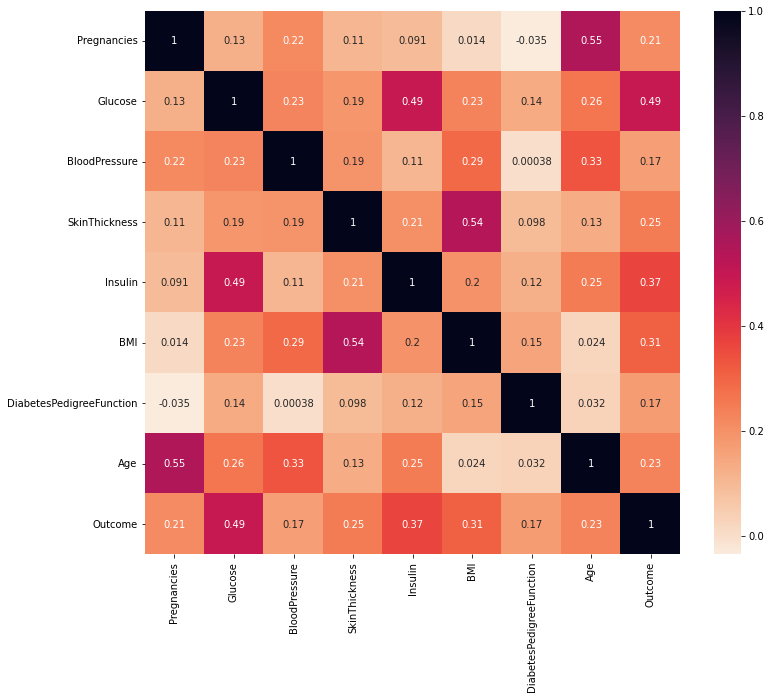

In [ ]:
# cmap = sns.color_palette("rocket_r", as_cmap = True)
plt.figure(figsize=(12,10))
sns.heatmap(data_corr.corr(), cmap="rocket_r", annot=True)

In [ ]:
# data visualization and story telling

In [ ]:
data_temiz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


Text(0, 0.5, 'Insulin')

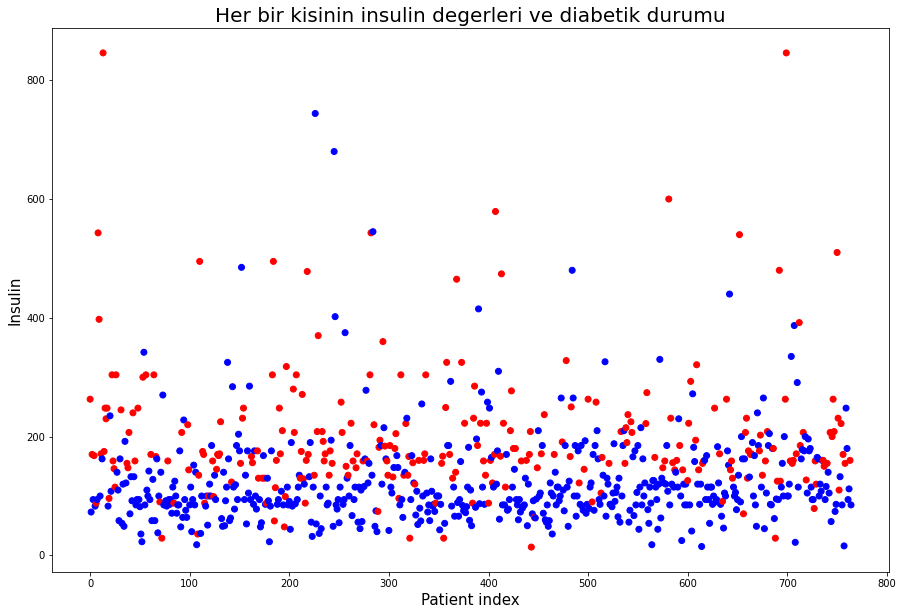

In [ ]:
plt.figure(figsize=(15,10))
colors = {'0':'blue', '1':'red'}
plt.scatter(data_temiz.index, data_temiz.Insulin, c=data_temiz['Outcome'].map(colors))
plt.title('Her bir kisinin insulin degerleri ve diabetik durumu', fontsize =20)
plt.xlabel('Patient index', fontsize = 15)
plt.ylabel('Insulin', fontsize=15)

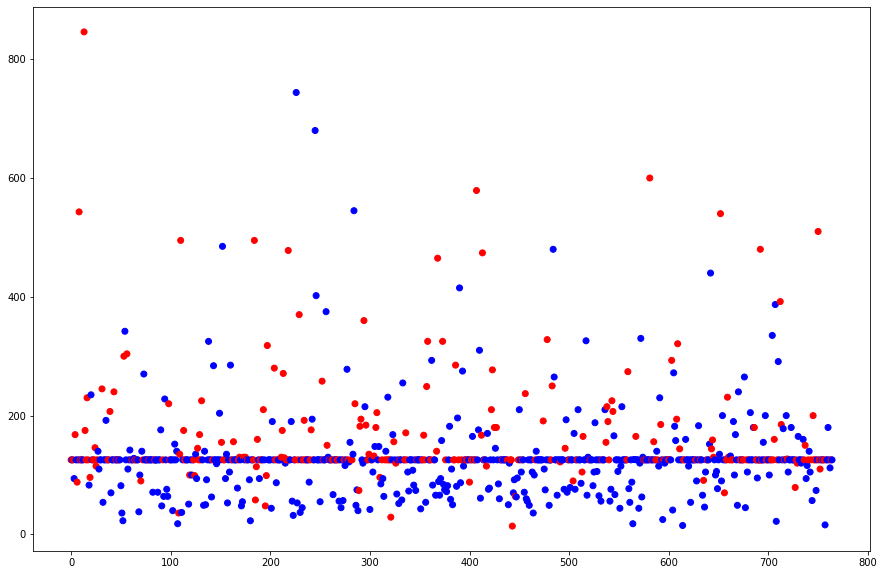

In [ ]:
plt.figure(figsize=(15,10))
colors = {'0':'blue', '1':'red'}
plt.scatter(data_yari_temiz.index, data_yari_temiz.Insulin, c=data_yari_temiz['Outcome'].map(colors))

In [ ]:
data_temiz = data_temiz.reset_index()

In [ ]:
data_temiz

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...
760,760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [ ]:
px.scatter(data_temiz, x='index', y='Insulin', color='Outcome', color_discrete_sequence= ['red', 'blue'])

In [ ]:
data_insulin = data_temiz.groupby(["Outcome"]).agg({'Insulin':'mean'}).reset_index()

In [ ]:
data_insulin

,Outcome,Insulin
0,0,122.743000
1,1,199.235849


In [ ]:
px.bar(data_insulin, x='Outcome', y='Insulin', color='Outcome', title='Diabetik olan ve olmayanlarin ortalama insulin degeri')

In [ ]:
# odev:
# Glucose ile Outcome arasindaki iliskiyi yukarida gosterdigimiz gibi iki tablo ile gosterin. 
# matlotlib veya plotly nin scatter plot
# ve plotly bar grafigini cizin. 
# support@datamastery.academy

In [ ]:
px.scatter(data_temiz, x='Glucose', y='Insulin', color='Outcome', color_discrete_sequence=['red', 'blue'])

In [ ]:
px.scatter(data_temiz, x='Glucose', y='Insulin',  trendline="ols")

In [ ]:
px.scatter(data_temiz, x='BMI', y='Insulin', color='Outcome', color_discrete_sequence=['red', 'blue'])